In [31]:
import pandas as pd
import nodule_structs
import xml.etree.ElementTree as etree
import numpy as np
import pydicom as dcm
import numpy as np
import nodule_structs
import annotations as ants
import xml.etree.ElementTree as etree
import copy
import os

In [20]:
ann = pd.read_csv("C:\\Users\\stan_\\OneDrive\\Документы\\metadata.csv")

In [21]:
#ann[ann['Series UID'].index == '1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102183795724852353824']['File Location'].values

In [174]:
#a = list(ann['Series UID'].index)
#for i in range(5):
#    print(a[i])
#a.index("1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102183795724852353824")

1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900213760403901722902
1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357
1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192
1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615202213033480003264
1.3.6.1.4.1.14519.5.2.1.6279.6001.142026812390984321013050559882


155

In [22]:
ann.head(1)

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900213760403901722902,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.116951808801...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,DX,Digital X-Ray Image Storage - For Presentation,1.2.840.10008.5.1.4.1.1.1.1,1,6,91 MB,.\LIDC-IDRI\LIDC-IDRI-0002\01-01-2000-NA-NA-26...,2023-03-03T17:54:02.695


In [23]:
drop_ann = ann.drop(columns=['3rd Party Analysis', 'Collection', 'File Size', 'Download Timestamp', 'Study Date', 'Series Description', 'Study UID', 'Manufacturer', 'Modality', 'SOP Class UID', 'Number of Images', 'Study Description', ])
drop_ann.head(2)

,Series UID,Data Description URI,Subject ID,SOP Class Name,File Location
1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900213760403901722902,LIDC-IDRI,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.116951808801...,1.2.840.10008.5.1.4.1.1.1.1,.\LIDC-IDRI\LIDC-IDRI-0002\01-01-2000-NA-NA-26...
1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357,LIDC-IDRI,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118...,1.2.840.10008.5.1.4.1.1.1.1,.\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-35...


In [ ]:
ds = dcm.read_file("C:\\Prj\\LIDC-IDRI\\LIDC-IDRI-0001\\01-01-2000-NA-NA-30178\\3000566.000000-NA-03192\\1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255.dcm")

In [10]:
#data_voi = dcm.pixel_data_handlers.apply_voi_lut(ds.pixel_array, ds)
#data_voi

array([[-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272],
       [-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272],
       [-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272],
       ...,
       [-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272],
       [-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272],
       [-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272]])

In [11]:
np.max(ds.pixel_array)
for i in np.unique(ds.pixel_array):
    print(i, end = ' ')

-1024 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 

In [1]:
texture1 = np.load("texture1.npy")
texture2 = np.load("texture2.npy")
texture3 = np.load("texture3.npy")
texture4 = np.load("texture4.npy")
texture5 = np.load("texture5.npy")


NameError: name 'np' is not defined

In [ ]:
for i in range(1, 11):
    

In [13]:
data_voi = ds.pixel_array - np.min(ds.pixel_array)
data_voi = data_voi / np.max(data_voi)
normalize_version = (data_voi * 255).astype(np.float32)
normalize_version

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
from matplotlib import pyplot as plt
plt.imshow(normalize_version, 'gray')

NameError: name 'normalize_version' is not defined

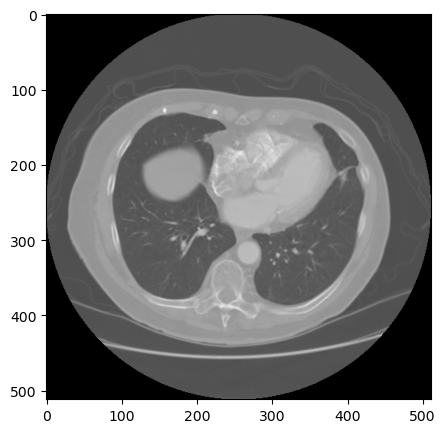

In [34]:
ds2 = dcm.read_file("C:\\Prj\\LIDC-IDRI\\LIDC-IDRI-0001\\01-01-2000-NA-NA-30178\\3000566.000000-NA-03192\\1.3.6.1.4.1.14519.5.2.1.6279.6001.265752406785564034990206112632.dcm")
plt.figure(figsize = (5,5))
from copy import copy
plt.imshow(ds2.pixel_array, 'gray')


In [10]:
NS = {'nih': 'http://www.nih.gov'}
NS1 ={'nih': 'http://www.nih.gov/idri'}

def parse(xml_filename):
    print("Parsing %s" % xml_filename)
    annotations = []
    ns_here = copy.copy(NS)
    p = ''
    tree = etree.parse(xml_filename)
    print('Tree', tree)
    root = tree.getroot()
    # header = parse_header(root)
    # readingSession-> holds radiologist's annotation info
    print('Root', root)
    rad_annotation = nodule_structs.RadAnnotation()
    resp_hdr = root.findall('nih:ResponseHeader', ns_here)
    if resp_hdr == []: return;
    print(ns_here)
    print(resp_hdr[0])
    rad_annotation.SeriesInstanceUid = resp_hdr[0].find('nih:SeriesInstanceUid', ns_here).text
    for read_session in root.findall('nih:readingSession', ns_here):
        # to hold each radiologists annotation
        # i.e. readingSession in xml file
        ##rad_annotation.version = read_session.find('nih:annotationVersion', ns_here).text
        ##rad_annotation.id = read_session.find('nih:servicingRadiologistID', ns_here).text
        # nodules
        nodule_nodes = read_session.findall('nih:unblindedReadNodule', ns_here)
        for node in nodule_nodes:
            # print("node from parse")
            # print(node)
            nodule = ants.parse_nodule(node)
            if nodule.is_small:
                rad_annotation.small_nodules.append(nodule)
            else:
                rad_annotation.nodules.append(nodule)

        # non-nodules
        non_nodule = read_session.findall('nih:nonNodule', ns_here)
        for node in non_nodule:
            nodule = ants.parse_non_nodule(node)
            rad_annotation.non_nodules.append(nodule)
        annotations.append(rad_annotation)
        rad_annotation = nodule_structs.RadAnnotation() 
    return annotations

In [6]:
slice_thUID = pd.read_csv('series_thickness').drop(columns = ['Unnamed: 0'])
slice_thUID.head()

,series_instance_uid
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102...
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.131939324905...
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.213233719488...
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.340202188094...
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.311102747717...


In [11]:
def small_nds(annots):
    smnds = []
    all_smnds = []
    for k in annots:
        print(k.SeriesInstanceUid)
        all_smnds.append([])
        for i in k.small_nodules:
            for j in i.rois:
                all_smnds[-1].append([j.sop_uid, j.roi_xy[0]])
    #for i in all_smnds:
    #    print(i)
    if annots[0].SeriesInstanceUid not in slice_thUID['series_instance_uid'].values: print('Yes'); return

    smnds.append(annots[0].SeriesInstanceUid)
    while len(all_smnds) != 0:
        #print(len(all_smnds))
        temp = all_smnds.pop(0)
        for i in range(len(temp)):
            k = 0
            k_annots = 0
            while k != len(all_smnds):
                s = 0
                while s != len(all_smnds[k]):
                    if all_smnds[k][s][0] == temp[i][0]:
                        #проверка на близость нахождения центроидов для исключения дублей
                        if abs(temp[i][1][0] - all_smnds[k][s][1][0]) < 10 and abs(temp[i][1][1] - all_smnds[k][s][1][1]) < 10:
                            k_annots += 1
                            #print("удаление дубля", all_smnds[k][s])
                            all_smnds[k].pop(s)
                        else:
                            s += 1
                    else:
                        s += 1
                k += 1
                
            if k_annots >= 1:
                smnds.append(temp[i])
    return smnds

In [ ]:
#import os
#sm_nodules = []
#xmldir = "C:\\Prj\\LIDC-IDRI\\LIDC-XML-only (1)\\tcia-lidc-xml"
#k = 0
#for i in os.listdir(xmldir):
#    print(k)
#    k += 1
#    for j in os.listdir(xmldir + '\\' + i):
#        sm_nodules.append(parse(xmldir + '\\' + i + '\\' + j))

In [ ]:

nnodules = []
xmldir = "C:\\Prj\\LIDC-IDRI\\LIDC-XML-only (1)\\tcia-lidc-xml"
k = 0
for i in os.listdir(xmldir):
    print(k)
    k += 1
    for j in os.listdir(xmldir + '\\' + i):
        nnodules.append(parse(xmldir + '\\' + i + '\\' + j))

In [ ]:
#small_nds_data = []
#l = 0
#for k in sm_nodules:
#    print(l)
#    l += 1
#    if k == None: continue
#    print(k)
#    small_nds_data.append(small_nds(k))

In [15]:
def nnd(annots):
    nnds = []
    all_nnds = []
    for k in annots:
        print(k.SeriesInstanceUid)
        all_nnds.append([])
        for i in k.non_nodules:
            for j in i.rois:
                all_nnds[-1].append([j.sop_uid, j.roi_xy[0]])
    #for i in all_nnds:
    #    print(i)
    if annots[0].SeriesInstanceUid not in slice_thUID['series_instance_uid'].values: print('Yes'); return

    nnds.append(annots[0].SeriesInstanceUid)
    while len(all_nnds) != 0:
        #print(len(all_nnds))
        temp = all_nnds.pop(0)
        for i in range(len(temp)):
            k = 0

            while k != len(all_nnds):
                s = 0
                while s != len(all_nnds[k]):
                    if all_nnds[k][s][0] == temp[i][0]:
                        #проверка на близость нахождения центроидов для исключения дублей
                        if abs(temp[i][1][0] - all_nnds[k][s][1][0]) < 16 and abs(temp[i][1][1] - all_nnds[k][s][1][1]) < 16:
                            print("удаление дубля", all_nnds[k][s])
                            all_nnds[k].pop(s)
                        else:
                            s += 1
                    else:
                        s += 1
                k += 1
            nnds.append(temp[i])
    return nnds

In [ ]:
nnds_data = []
l = 0
for k in nnodules:
    print(l)
    l += 1
    if k == None: continue
    print(k)
    nnds_data.append(nnd(k))

In [ ]:
nnds_data

In [3]:
#smnods_p1 = np.load('small_nods_p1.npy')
#smnods_p2 = np.load('small_nods_p2.npy')
#smnods_p3 = np.load('small_nods_p3.npy')
#smnods_p4 = np.load('small_nods_p4.npy')
#smnods_p5 = np.load('small_nods_p5.npy')
#smnods_p6 = np.load('small_nods_p6.npy')
#fin_sm_n = np.concatenate((smnods_p1, smnods_p2, smnods_p3, smnods_p4, smnods_p5, smnods_p6), axis = 0)
#np.save('all_small_nodes', fin_sm_n)

In [28]:
#nnds_p1 = np.load('nnd_p1.npy')
#nnds_p2 = np.load('nnd_p2.npy')
#nnds_p3 = np.load('nnd_p3.npy')
#nnds_p4 = np.load('nnd_p4.npy')
#nnds_p5 = np.load('nnd_p5.npy')
#fin_nnd = np.concatenate((nnds_p1, nnds_p2, nnds_p3, nnds_p4, nnds_p5), axis = 0)
#np.save('all_nnds', fin_nnd)

In [29]:
fin_nnd.shape

(4935, 32, 32, 16)

In [ ]:
uid_xy = []
for i in small_nds_data:
    print(i)
    if i == None: continue
    for j in range(1, len(i)):
        print(j)
        uid_xy.append([i[0], i[j][0], i[j][1][0], i[j][1][1]])
small_data = pd.DataFrame(data = uid_xy, columns = ['series_instance_uid', 'sop_iud', 'x', 'y'])

In [ ]:
uid_xy = []
for i in nnds_data:
    print(i)
    if i == None: continue
    for j in range(1, len(i)):
        print(j)
        uid_xy.append([i[0], i[j][0], i[j][1][0], i[j][1][1]])
nonnodules_data = pd.DataFrame(data = uid_xy, columns = ['series_instance_uid', 'sop_iud', 'x', 'y'])

In [ ]:
#small_data.to_csv('small_nodules_data')
prev_suid = []
sm_np = []
red = 0
for i in small_data.values:
    print(red)
    red += 1
    if red < 3856:
        prev_suid.append(i[0])
        continue
    if i[0] not in prev_suid:
        prev_suid.append(i[0])
        pth = 'C:\\Prj\\diploma' + drop_ann[drop_ann.index == i[0]]['File Location'].values[0][1:]
        suid = []
        pixs_test = []
        for f in os.listdir(pth):
            d = pth + '\\' + f
            if '.dcm' not in d: continue
            tmp = dcm.read_file(pth + '\\' + f, force=True)
            suid.append(tmp.SOPInstanceUID)
            pixs_test.append(tmp.pixel_array)
        pixs_test = np.array(pixs_test).transpose()
        print(pixs_test.shape)
        for j in small_data[small_data['series_instance_uid'] == i[0]].values:
            if j[1] not in suid: continue
            ind = suid.index(j[1])
            add = pixs_test[int(j[-2]-16):int(j[-2]+16), int(j[-1]-16):int(j[-1]+16), int(ind-8):int(ind+8)]
            if add.shape == (32, 32, 16):
                sm_np.append(pixs_test[int(j[-2]-16):int(j[-2]+16), int(j[-1]-16):int(j[-1]+16), int(ind-8):int(ind+8)])
        print((np.array(sm_np).shape))

In [27]:
#nonnodules_data.to_cll_nodules_data')
prev_suid = []
sm_np = []
red = 0
for i in nonnodules_data.values:
    print(red)
    red += 1
    if red % 1000 == 0:
        np.save("nnd_p" + str(red//1000), np.array(sm_np))
        sm_np = []
        #prev_suid.append(i[0])
        #continue
    if i[0] not in prev_suid:
        prev_suid.append(i[0])
        pth = 'C:\\Prj\\diploma' + drop_ann[drop_ann.index == i[0]]['File Location'].values[0][1:]
        suid = []
        pixs_test = []
        for f in os.listdir(pth):
            d = pth + '\\' + f
            if '.dcm' not in d: continue
            tmp = dcm.read_file(pth + '\\' + f, force=True)
            suid.append(tmp.SOPInstanceUID)
            pixs_test.append(tmp.pixel_array)
        pixs_test = np.array(pixs_test).transpose()
        print(pixs_test.shape)
        for j in nonnodules_data[nonnodules_data['series_instance_uid'] == i[0]].values:
            if j[1] not in suid: continue
            ind = suid.index(j[1])
            add = pixs_test[int(j[-2]-16):int(j[-2]+16), int(j[-1]-16):int(j[-1]+16), int(ind-8):int(ind+8)]
            if add.shape == (32, 32, 16):
                sm_np.append(pixs_test[int(j[-2]-16):int(j[-2]+16), int(j[-1]-16):int(j[-1]+16), int(ind-8):int(ind+8)])
        print((np.array(sm_np).shape))

0
(512, 512, 87)
(6, 32, 32, 16)
1
2
3
4
5
6
(512, 512, 136)
(27, 32, 32, 16)
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
(512, 512, 113)
(34, 32, 32, 16)
28
29
30
31
32
33
34
(512, 512, 150)
(40, 32, 32, 16)
35
36
37
38
39
40
(512, 512, 125)
(46, 32, 32, 16)
41
42
43
44
45
46
(512, 512, 112)
(47, 32, 32, 16)
47
(512, 512, 127)
(78, 32, 32, 16)
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
(512, 512, 153)
(134, 32, 32, 16)
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
(512, 512, 102)
(146, 32, 32, 16)
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
(512, 512, 111)
(153, 32, 32, 16)
150
151
152
153
154
155
156
157
158
159
160
(512, 512, 115)
(174, 32, 32, 16)
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
(512, 512, 133)
(

KeyboardInterrupt: 

In [53]:
annotations[0].small_nodules[0].rois[0].roi_xy

[[187, 166]]

In [56]:
for k in annotations:
    print(k.SeriesInstanceUid)
    for i in k.small_nodules:
        #print(i)
        for j in i.rois:
                print(j.sop_uid, j.roi_xy[0])

1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192
1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255 [187, 166]
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [403, 272]
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [392, 317]
NoneSeries
NoneSeries
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [392, 317]
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [404, 273]
1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255 [189, 167]
NoneSeries
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [392, 316]
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [403, 272]
1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255 [188, 166]


In [28]:
nnd = []
for i in annotations[0].non_nodules:
    for i in i.rois:
        nnd.append([])
        
        print(i.sop_uid)

1.3.6.1.4.1.14519.5.2.1.6279.6001.265752406785564034990206112632
1.3.6.1.4.1.14519.5.2.1.6279.6001.588464900616851045070333788793
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142
1.3.6.1.4.1.14519.5.2.1.6279.6001.980992723094835143194725792701


In [21]:
for i in rad_annotation.small_nodules:
    for j in i.rois:
        print(j.sop_uid, j.roi_xy)
print(rad_annotation.__str__())

Series Instance UID NoneSeries
Annotation Version [None] Radiologist ID [None] 
#Nodules [0] #SmallNodules [0] #NonNodules[0] 
-------------------------------------------------------------------------------



In [22]:
parse('C:\\Prj\\LIDC-IDRI\\xml_test\\069.xml')

Parsing C:\Prj\LIDC-IDRI\xml_test\069.xml
Tree <xml.etree.ElementTree.ElementTree object at 0x000002414BB05C30>
Root <Element '{http://www.nih.gov}LidcReadMessage' at 0x000002414BB1C3B0>


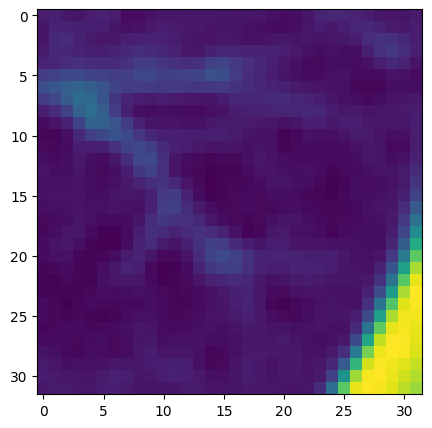

In [23]:
from copy import copy
test = copy(ds2.pixel_array[317-16:317+16:, 392-16:392+16:])
temp = test - np.min(test)
temp = (temp/np.max(temp))*255
plt.figure(figsize = (5,5))

plt.imshow(temp, vmin=0, vmax=255)

In [24]:
np.min(test)

91

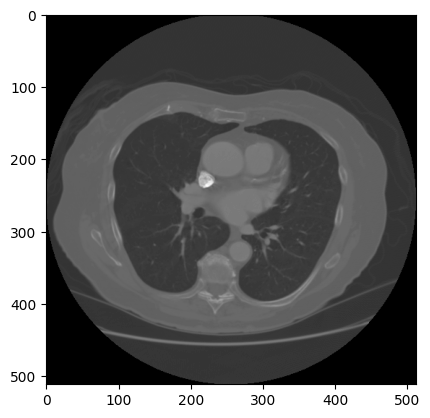

In [25]:
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

In [1]:
dd = pd.read_pickle('C:\\Prj\\LIDC-IDRI\\xml_test\\annotation.pkl')

NameError: name 'pd' is not defined

In [27]:
for i in dd:
    for j in i:
        print(j.__str__())

AttributeError: 'RadAnnotation' object has no attribute 'SeriesInstanceUid'

In [2]:
import pylidc as pl

In [28]:
anns = pl.query(pl.Annotation).filter(pl.Annotation.spiculation == 5,
                                      pl.Annotation.malignancy == 5)

In [3]:
st = []
ann = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 3)
for i in ann:
    st.append(i.series_instance_uid)

In [79]:
#pd.DataFrame(centers).to_csv("centers1")

In [4]:
import pandas as pd

In [54]:
s = [0, 0, 0]
t = 0
z = 0
for i in dims:
    f = [0, 0, 0]
    for j in i[1:]:
        for k in range(3):
            f[k] += j[k]
    for k in range(3):
        if(len(i) - 1) == 0:
            z += 1
            continue
        s[k] += f[k]/(len(i) - 1)
s[0]/(len(dims) - z), s[1]/(len(dims) - z), s[2]/(len(dims) - z)

(18.05418118466898, 18.099245063879206, 5.569337979094075)

In [ ]:
centers = []
dims = []
ho = 0
for i in bb:
    ho += 1
    print(ho)
    summa = [0, 0, 0]
    vol = i[1][0].scan.to_volume()
    dims.append(vol[j.bbox()].shape)     
    

In [ ]:
ho = 0
for i in bb1:
    ho += 1
    print(ho)
    summa = [0, 0, 0]
    vol = i[1][0].scan.to_volume()
    dims.append(vol[j.bbox()].shape)

In [ ]:
ho = 0
for i in bb2:
    ho += 1
    print(ho)
    summa = [0, 0, 0]
    vol = i[1][0].scan.to_volume()
    dims.append(vol[j.bbox()].shape) 

In [5]:
centers = pd.read_csv('nods_3more', index_col = False).drop(columns = ['Unnamed: 0'])
xyz = []
for i in centers.values:
    l = i[1].replace(']', '').replace('[', '').split(', ')
    for j in range(3):
        l[j] = float(l[j])
    xyz.append(l)

centers[['x', 'y', 'z']] = xyz

In [6]:
centers

,series_instance_uid,centroid,texture,x,y,z
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102...,"[311.49780802004307, 330.2463850494521, 25.428...",4.750000,311.497808,330.246385,25.428445
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102...,"[169.56776244048638, 360.9852520746882, 46.283...",4.500000,169.567762,360.985252,46.283424
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102...,"[244.8374771188408, 341.27902357159314, 67.625...",4.750000,244.837477,341.279024,67.625685
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.131939324905...,"[369.0607414821925, 168.08922689352136, 39.958...",4.750000,369.060741,168.089227,39.958846
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.131939324905...,"[372.2893897222484, 123.45349492279499, 82.641...",4.750000,372.289390,123.453495,82.641281
...,...,...,...,...,...,...
1377,1.3.6.1.4.1.14519.5.2.1.6279.6001.299767339686...,"[198.0825193325193, 85.24409849409848, 70.5385...",5.000000,198.082519,85.244098,70.538563
1378,1.3.6.1.4.1.14519.5.2.1.6279.6001.299767339686...,"[184.1608868241401, 418.8471649690651, 81.6412...",5.000000,184.160887,418.847165,81.641230
1379,1.3.6.1.4.1.14519.5.2.1.6279.6001.175773779529...,"[213.6878576541236, 421.93238245519444, 42.896...",5.000000,213.687858,421.932382,42.896068
1380,1.3.6.1.4.1.14519.5.2.1.6279.6001.175773779529...,"[168.652046659597, 329.03982325910215, 71.5406...",2.333333,168.652047,329.039823,71.540601


In [7]:
import numpy as np
#487

In [24]:
#p1 = np.load('f200.npy')
#p2 = np.load('f201400.npy')
#p3 = np.load('f4001600.npy')
#p4 = np.load('f6001800.npy')
#p5 = np.load('f8011000.npy')
#p6 = np.load('10011200.npy')
#p7 = np.load('12011400.npy')
#fin = np.concatenate((p1, p2,p3, p4, p5, p6, p7),  axis = 0)

In [27]:
#np.save('nods_3more_data', fin), centers.to_csv("centers_fin")

(None, None)

In [ ]:
#nods3 = []
#l = 0
#for i in centers.values:
#    print(l)
#    l += 1
#    if l < 1201: continue
#    tmp = pl.query(pl.Scan).filter(pl.Scan.series_instance_uid == i[0]).first()
#    vol = tmp.to_volume()
#    h = vol[int(i[-3]-16):int(i[-3]+16), int(i[-2]-16):int(i[-2]+16), int(i[-1]-8):int(i[-1]+8)]
#    nods3.append(h)
#    if l > 1399: break
#    
#np.save('12011400', np.array(nods3))

In [183]:
centers[centers['z'] == max(centers['z'].values)]['series_instance_uid'].values

array(['1.3.6.1.4.1.14519.5.2.1.6279.6001.430109407146633213496148200410'],
      dtype=object)

In [ ]:
bb2[0][1][0].scan.to_volume()

In [ ]:
dims = []
ho = 0
for i in bb:
    print(ho)
    ho += 1
    summa = 0
    i[1][0]:
        summa += j.texture 
    if len(i[1]) == 0: continue
    textures.append(summa/len(i[1]))

In [ ]:
bb2 = []

ann = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 3)
print(ann.count(), end = ' ')
k = 0
for i in ann:
    print(k)
    k += 1
    if k <= 900: continue
    #if i.scan.series_instance_uid in st and len(i.scan.cluster_annotations()):
    #    bb.append(i.bbox())
    nods = i.cluster_annotations()
    for j in nods:
        if len(j) >= 3:
            bb2.append([i.series_instance_uid, j])

In [18]:
scan = pl.query(pl.Scan).first()
nods = scan.cluster_annotations()
for i in nods:
    print(i)

[Annotation(id=2,scan_id=1), Annotation(id=6,scan_id=1), Annotation(id=10,scan_id=1), Annotation(id=13,scan_id=1)]
[Annotation(id=1,scan_id=1), Annotation(id=5,scan_id=1), Annotation(id=9,scan_id=1), Annotation(id=12,scan_id=1)]
[Annotation(id=8,scan_id=1)]
[Annotation(id=3,scan_id=1), Annotation(id=4,scan_id=1), Annotation(id=7,scan_id=1), Annotation(id=11,scan_id=1)]


In [10]:
pid = 'LIDC-IDRI-0078'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

In [22]:
#temp = pd.DataFrame(st, columns= ['series_instance_uid'])
#temp.to_csv("series_thickness")

In [40]:
#xml_filename = 'C:\\Prj\\LIDC-IDRI\\xml_test\\069.xml'
#
#print("Parsing %s" % xml_filename)
#annotations = []
#
#tree = etree.parse(xml_filename)
#print('Tree', tree)
#root = tree.getroot()
## header = parse_header(root)
## readingSession-> holds radiologist's annotation info
#print('Root', root)
#rad_annotation = nodule_structs.RadAnnotation()
#resp_hdr = root.findall('nih:ResponseHeader', NS)[0]
#rad_annotation.SeriesInstanceUid = resp_hdr.find('nih:SeriesInstanceUid', NS).text
#for read_session in root.findall('nih:readingSession', NS):
#    # to hold each radiologists annotation
#    # i.e. readingSession in xml file
#    rad_annotation.version = read_session.find('nih:annotationVersion', NS).text
#    rad_annotation.id = read_session.find('nih:servicingRadiologistID', NS).text
#    # nodules
#    nodule_nodes = read_session.findall('nih:unblindedReadNodule', NS)
#    for node in nodule_nodes:
#        # print("node from parse")
#        # print(node)
#        nodule = ants.parse_nodule(node)
#        if nodule.is_small:
#            rad_annotation.small_nodules.append(nodule)
#        else:
#            rad_annotation.nodules.append(nodule)
#
#    # non-nodules
#    non_nodule = read_session.findall('nih:nonNodule', NS)
#    for node in non_nodule:
#        nodule = ants.parse_non_nodule(node)
#        rad_annotation.non_nodules.append(nodule)
#    annotations.append(rad_annotation)
#    rad_annotation = nodule_structs.RadAnnotation() 

Parsing C:\Prj\LIDC-IDRI\xml_test\069.xml
Tree <xml.etree.ElementTree.ElementTree object at 0x000001F61F80A130>
Root <Element '{http://www.nih.gov}LidcReadMessage' at 0x000001F600431B80>
